In [8]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#reading the file containing data points
df = pd.read_csv("timeToServe.csv")

In [10]:
#adding MRi column to the data
df['MR'] = abs(df['time'].diff()) #calculates MRi 

In [11]:
#the data we will use to calculate control limits 
df

,time,MR
0,11.92,NaN
1,11.02,0.90
2,10.34,0.68
3,11.09,0.75
4,11.53,0.44
5,12.03,0.50
6,13.88,1.85
7,11.21,2.67
8,10.20,1.01
9,13.20,3.00


In [12]:
#Calculations 
X_Bar = df['time'].mean()
MR_Bar = df['MR'].mean()
standerd_d = MR_Bar/1.128
print(f"xBar= {X_Bar} \nMRbar= {MR_Bar}")
print(f"standard deviation for d2=1.128 is= {standerd_d}") 

xBar= 11.705999999999994 
MRbar= 1.8441379310344834
standard deviation for d2=1.128 is= 1.6348740523355352


In [13]:
#Individual Chart
UCL = X_Bar + 3 * standerd_d
CenterLine = X_Bar
LCL = X_Bar - 3 *standerd_d
print(f"for the individual chart:\nUCL: {UCL}\nCL: {CenterLine}\nLCL: {LCL}")

for the individual chart:
UCL: 16.6106221570066
CL: 11.705999999999994
LCL: 6.801377842993388


In [14]:
#MR Chart
MR_UCL = 3.267 * MR_Bar
MR_CenterLine = MR_Bar
MR_LCL = 0
print(f"for the MR chart:\nUCL: {MR_UCL}\nCL: {MR_CenterLine}\nLCL: {MR_LCL}")

for the MR chart:
UCL: 6.0247986206896575
CL: 1.8441379310344834
LCL: 0


[Text(0.5, 0, 'Group'), Text(0, 0.5, 'Range')]

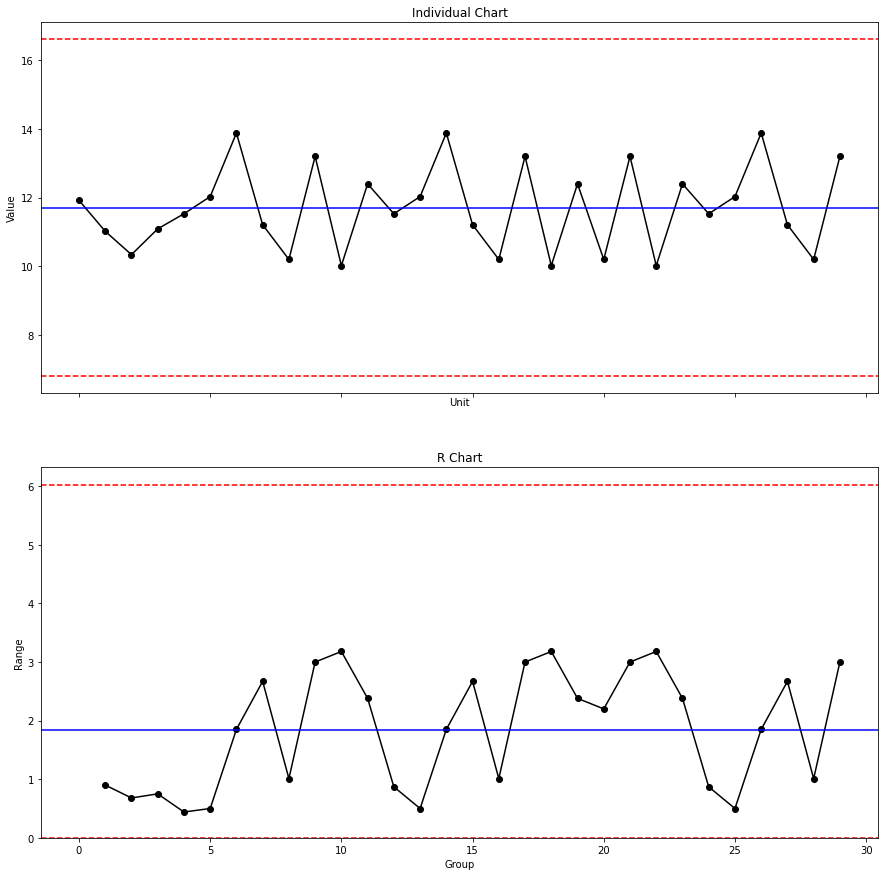

In [15]:
#plotting the charts 
fig, axs = plt.subplots(2, figsize=(15,15), sharex=True)

#Individual Chart
axs[0].plot(df['time'], linestyle='-', marker='o', color='black')
axs[0].axhline(CenterLine, color='blue')
axs[0].axhline(UCL, color = 'red', linestyle = 'dashed')
axs[0].axhline(LCL, color = 'red', linestyle = 'dashed')
axs[0].set_title('Individual Chart')
axs[0].set(xlabel='Unit', ylabel='Value')

#MR Chart
axs[1].plot(df['MR'], linestyle='-', marker='o', color='black')
axs[1].axhline(MR_UCL, color='red', linestyle='dashed')
axs[1].axhline(MR_LCL, color='red', linestyle='dashed')
axs[1].axhline(MR_CenterLine, color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')